In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [318]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [320]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [321]:
corr=data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

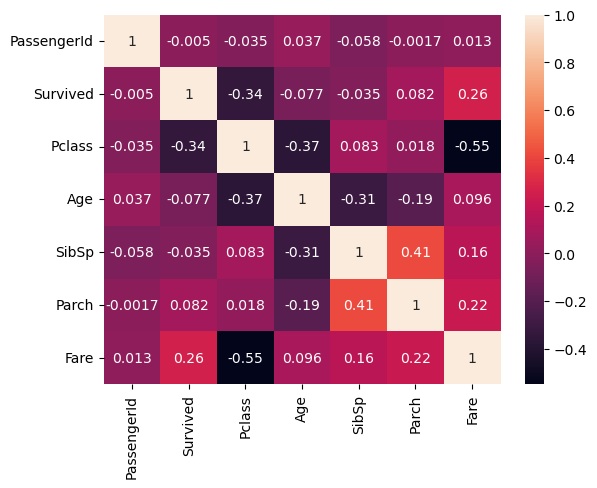

In [322]:

sns.heatmap(corr,annot=True)

In [323]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [324]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [325]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [326]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [327]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [328]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [329]:
data.isnull().sum()#I removed all null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

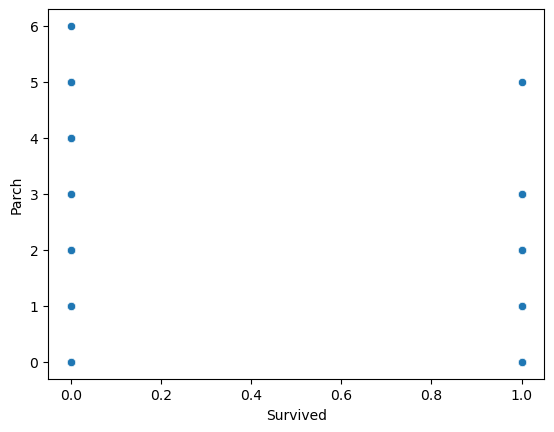

In [330]:
sns.scatterplot(x=data["Survived"],y=data["Parch"])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

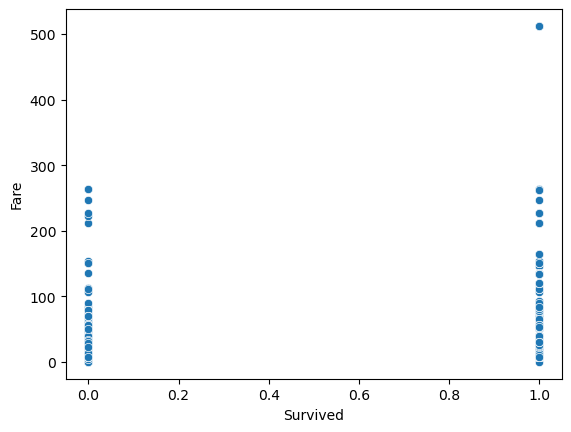

In [331]:
sns.scatterplot(x=data["Survived"],y=data["Fare"])

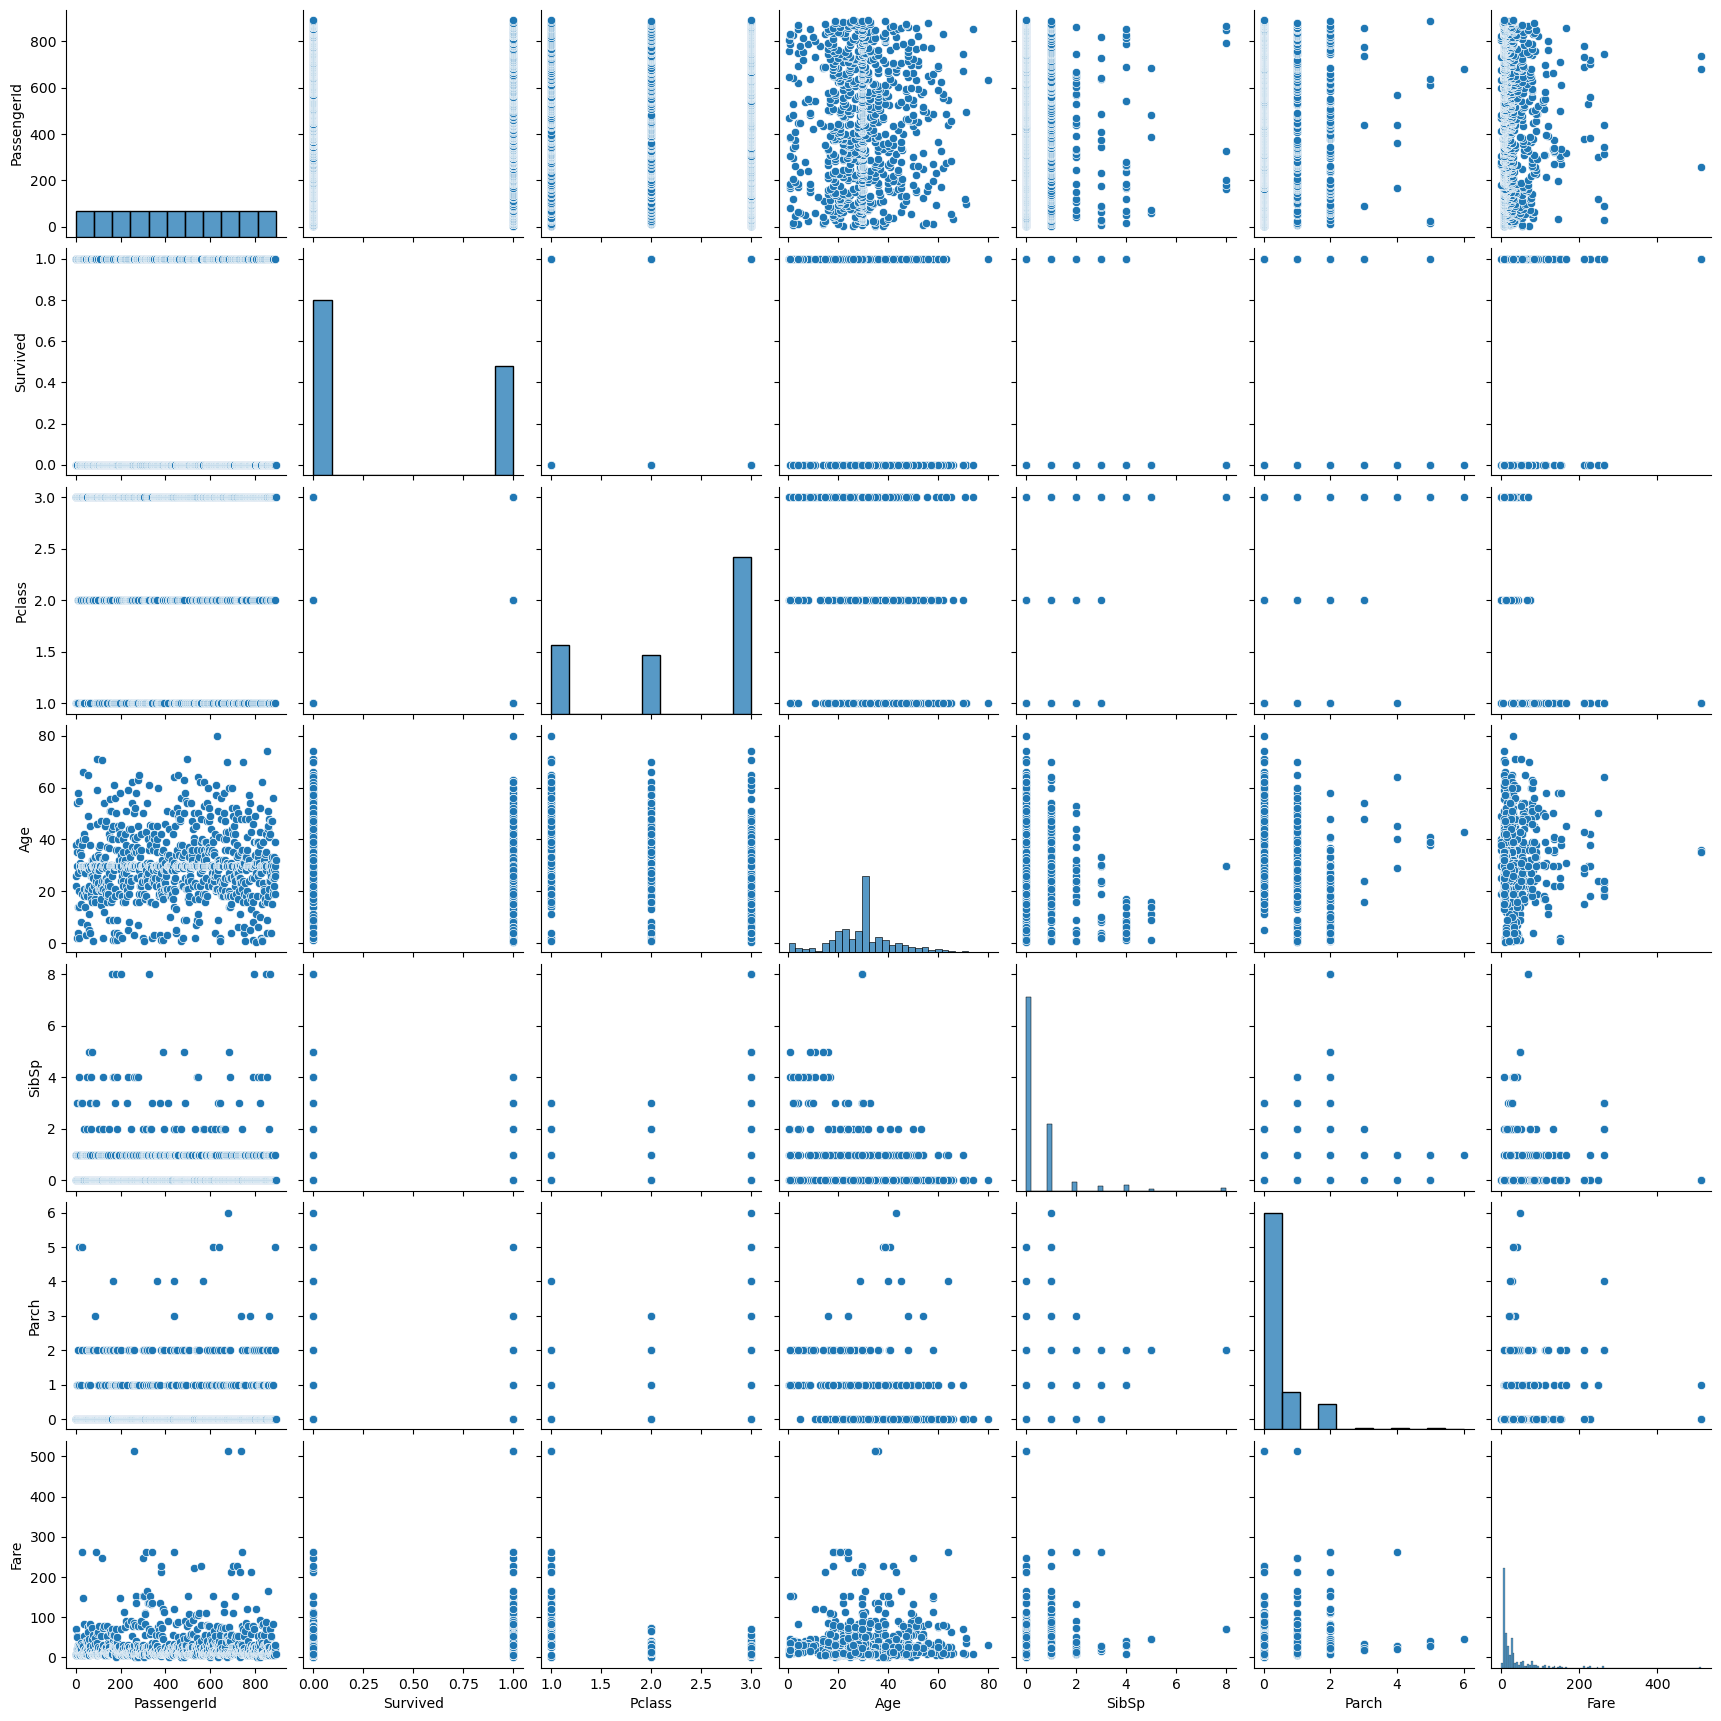

In [332]:
sns.pairplot(data)

In [333]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [334]:
data["Sex"]=le.fit_transform(data["Sex"])

In [335]:
data["Embarked"]=le.fit_transform(data["Embarked"])

In [336]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

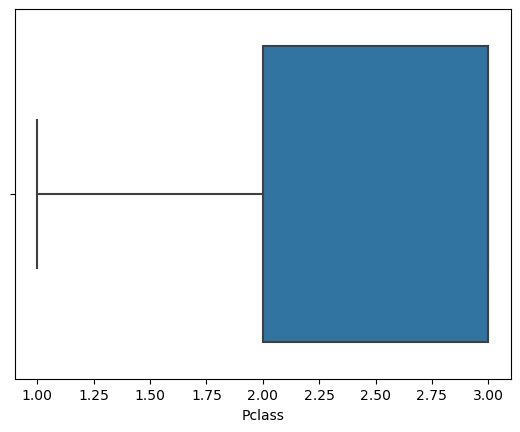

In [337]:
sns.boxplot(data['Pclass'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

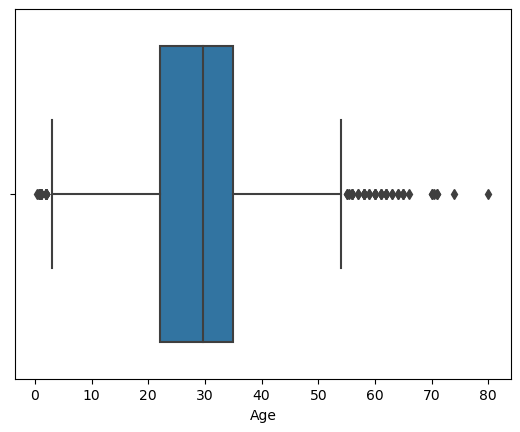

In [338]:
sns.boxplot(data['Age'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

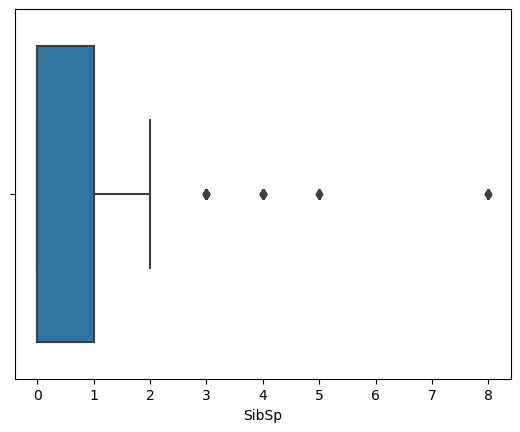

In [339]:
sns.boxplot(data['SibSp'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

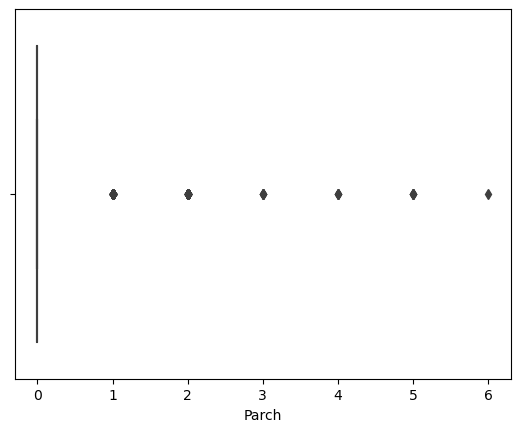

In [340]:
sns.boxplot(data['Parch'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

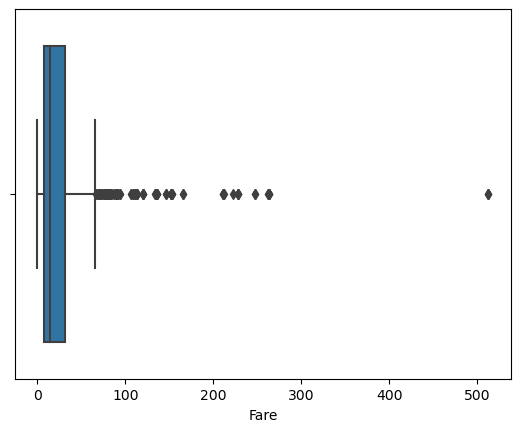

In [341]:
sns.boxplot(data['Fare'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked'>

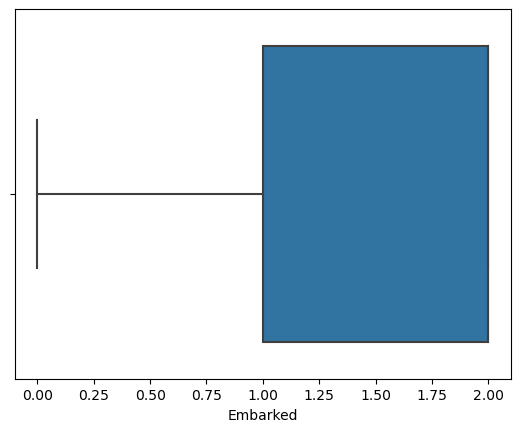

In [342]:
sns.boxplot(data['Embarked'])

In [343]:
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)
print(q1)
print(q3)

22.0
35.0


In [344]:
iqr=q3-q1
iqr

13.0

In [345]:
upperlimit = q3+1.5*iqr
upperlimit


54.5

In [346]:
lowerlimit=q1-1.5*iqr
lowerlimit

2.5

In [347]:
data.median()

C:\Users\harsh\AppData\Local\Temp\ipykernel_11488\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Sex              1.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
Embarked         2.000000
dtype: float64

In [348]:
data['Age']=np.where(data['Age']>upperlimit,29.699118,data['Age'])
data['Age'] = np.where(data['Age'] < lowerlimit,29.699118, data['Age'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

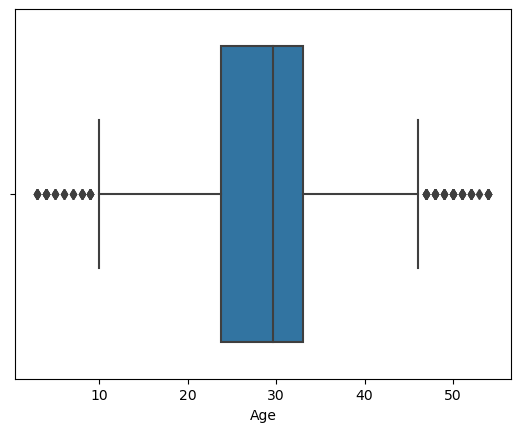

In [349]:
sns.boxplot(data['Age'])

In [350]:
q1=data.SibSp.quantile(0.25)
q3=data.SibSp.quantile(0.75)
print(q1)
print(q3)

0.0
1.0


In [351]:
iqr=q3-q1
iqr

1.0

In [352]:
upperlimit = q3+1.5*iqr
upperlimit


2.5

In [353]:
lowerlimit=q1-1.5*iqr
lowerlimit

-1.5

In [354]:
data['SibSp']=np.where(data['SibSp']>upperlimit,0.000000,data['SibSp'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

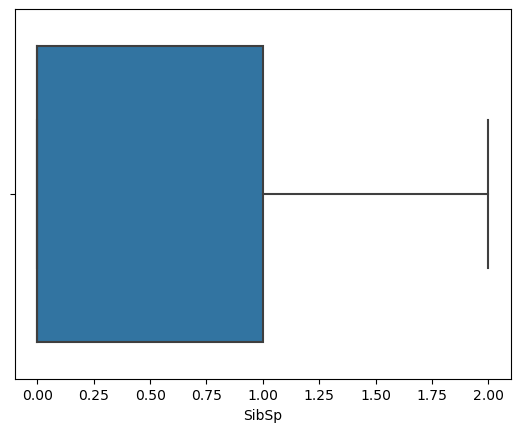

In [355]:
sns.boxplot(data['SibSp'])

In [356]:
q1=data.Parch.quantile(0.25)
q3=data.Parch.quantile(0.75)
print(q1)
print(q3)

0.0
0.0


In [357]:
iqr=q3-q1
iqr

0.0

In [358]:
upperlimit = q3+1.5*iqr
upperlimit

0.0

In [359]:
lowerlimit=q1-1.5*iqr
lowerlimit

0.0

In [360]:
data['Parch']=np.where(data['Parch']>upperlimit,0.000000,data['Parch'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

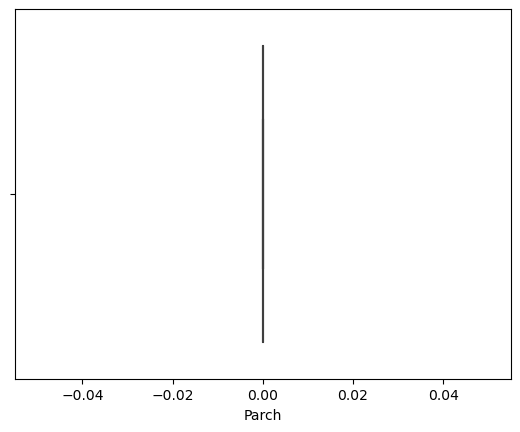

In [361]:
sns.boxplot(data['Parch'])

In [385]:
q1=data.Fare.quantile(0.25)
q3=data.Fare.quantile(0.75)
print(q1)
print(q3)

7.8958
30.0


In [386]:
iqr=q3-q1
iqr

22.1042

In [387]:
upperlimit = q3+1.5*iqr
upperlimit

63.1563

In [388]:
lowerlimit=q1-1.5*iqr
lowerlimit

-25.2605

In [389]:
data.median()

C:\Users\harsh\AppData\Local\Temp\ipykernel_11488\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


PassengerId    447.500000
Survived         0.000000
Pclass           3.000000
Sex              1.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.054150
Embarked         2.000000
dtype: float64

In [390]:
data['Fare']=np.where(data['Fare']>upperlimit,14.054150,data['Fare'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

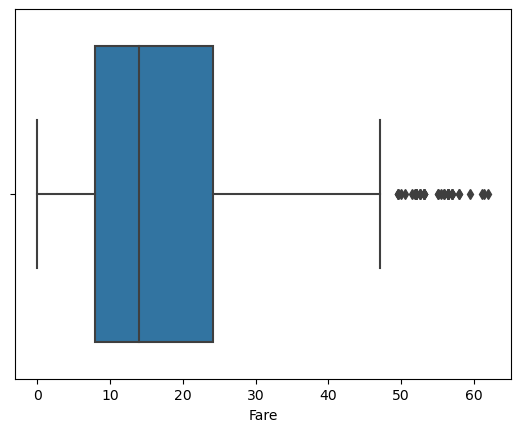

In [391]:
sns.boxplot(data.Fare)

In [392]:
y=data["Survived"]

In [393]:
X=data.drop(columns=["Name","PassengerId","Survived","Ticket","Cabin"],axis=1)

In [394]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [395]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [396]:
X_Scaled=ms.fit_transform(X)

In [397]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [398]:
X_Scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.372549,0.5,0.0,0.116975,1.0
1,0.0,0.0,0.686275,0.5,0.0,0.226756,0.0
2,1.0,0.0,0.450980,0.0,0.0,0.127865,1.0
3,0.0,0.0,0.627451,0.5,0.0,0.856739,1.0
4,1.0,1.0,0.627451,0.0,0.0,0.129882,1.0


In [399]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [400]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(699, 7) (175, 7) (699,) (175,)
